In [1]:
#extract zip with files for this to work, can't push > 100MB

def find_two_column_sequences(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        line_number = 0
        in_sequence = False
        sequence_start = None

        for raw_line in file:
            line_number += 1
            line = raw_line.strip()

            if not line: 
                continue

            columns = line.split('\t')

            if len(columns) == 2:
                if not in_sequence:
                    sequence_start = line_number
                    in_sequence = True
            else:
                if in_sequence:
                    print(f"Sequence of 2-column lines from line {sequence_start} to {line_number - 1}")
                    in_sequence = False


        if in_sequence:
            print(f"Sequence of 2-column lines from line {sequence_start} to {line_number}")



In [2]:
for i in range(6):
    print(f'corpus{i}')
    find_two_column_sequences(f'fullCorpus{i}.txt')


corpus0


FileNotFoundError: [Errno 2] No such file or directory: 'fullCorpus0.txt'

In [ ]:
for i in range(6):
   
    print(f"fullCorpus{i}.txt")

    with open(f'fullCorpus{i}.txt', 'r', encoding='utf-8') as file:
        line_number = 0
        for raw_line in file:
            line_number += 1
            if line_number == 66550:
                print(raw_line.strip())
            if line_number == 70000:
                print(raw_line.strip())
            if line_number == 130000:
                print(raw_line.strip())
                break
                
    
    
    

    

fullCorpus0.txt
0	iure
0	per
0	fecisset
fullCorpus1.txt
0	iure
0	per
0	fecisset
fullCorpus2.txt
0	iure
0	per
0	fecisset
fullCorpus3.txt
0	iure
0	per
0	fecisset
fullCorpus4.txt
0	iure
0	per
0	fecisset
fullCorpus5.txt
0	iure
0	per
0	fecisset


In [3]:
# Latin 4
# Sequence of 2-column lines from line 1 to 66556 : Cesars De Bello Gallico (BG)
# Sequence of 2-column lines from line 66558 to 86555: Ovid's Ars Amatoria (AA)
# Sequence of 2-column lines from line 126056 to 146067: Pliny the Younger Epistulae (EP)



In [7]:
def extract_lines(input_file, start_line, end_line, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
        for current_line_number, line in enumerate(infile, start=1):
            if start_line <= current_line_number <= end_line:
                outfile.write(line)
                
extract_lines('fullCorpus0.txt', 1, 66556, 'cesar.txt')
extract_lines('fullCorpus0.txt', 66558, 86555, 'ovid.txt')
extract_lines('fullCorpus0.txt', 126056, 146067, 'pliny.txt')


In [5]:
book_starts = [
     ("LIBER_PRIMUS", ["Litteris", "a", "Fabio", "C.", "Caesaris", "consulibus", "redditis"]),
        ("LIBER_SECUNDUS", ["Dum", "haec", "in", "Hispania", "geruntur"]), # not in the text?
        # ("LIBER_TERTIUS", []),
    ("COMENTARIUS_PRIMUS", ["Gallia", "est", "omnis", "divisa", "in", "partes", "tres"]),
    ("COMENTARIUS_SECUNDUS", ["Cum", "esset", "Caesar", "in", "citeriore", "Gallia"]),
    ("COMENTARIUS_TERTIUS", ["Cum", "in", "Italiam", "proficisceretur"]),
    ("COMENTARIUS_QUARTUS", ["Ea", "quae", "secuta", "est", "hieme"]),
    ("COMENTARIUS_QUINTUS", ["L.", "Domitio", "Ap.", "Claudio"]),
    ("COMENTARIUS_SEXTUS", ["Multis", "de", "causis", "Caesar", "maiorem"]),
    ("COMENTARIUS_SEPTIMUS", ["Gaio", "Trebonio", "legato"]),
    ("COMENTARIUS_OCTAVUS", ["Coactus", "assiduis", "tuis", "vocibus"]),
]

def split_books(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    words = [line.strip().split('\t')[1] for line in lines if '\t' in line]

    current_book = None
  

    start_idx = 0
    for i in range(len(words)):
        for book_name, start_seq in book_starts:
            if words[i:i+len(start_seq)] == start_seq:
                if current_book:
                    with open(f"{current_book}.txt", 'w', encoding='utf-8') as f_out:
                        f_out.writelines(lines[start_idx:i])
                    print(f"Saved {current_book}.txt from line {start_idx} to {i-1}")

                current_book = book_name
                start_idx = i
                break


    if current_book:
        with open(f"{current_book}.txt", 'w', encoding='utf-8') as f_out:
            f_out.writelines(lines[start_idx:])
        print(f"Saved {current_book}.txt from line {start_idx} to {len(lines)-1}")

split_books('../CleanedData/cesar.txt')


Saved LIBER_PRIMUS.txt from line 10 to 4835
Saved COMENTARIUS_QUARTUS.txt from line 4836 to 23333
Saved COMENTARIUS_PRIMUS.txt from line 23334 to 32706
Saved COMENTARIUS_SECUNDUS.txt from line 32707 to 37439
Saved COMENTARIUS_TERTIUS.txt from line 37440 to 41524
Saved COMENTARIUS_QUINTUS.txt from line 41525 to 44026
Saved COMENTARIUS_SEPTIMUS.txt from line 44027 to 50009
Saved COMENTARIUS_SEXTUS.txt from line 50010 to 56312
Saved COMENTARIUS_OCTAVUS.txt from line 56313 to 66555


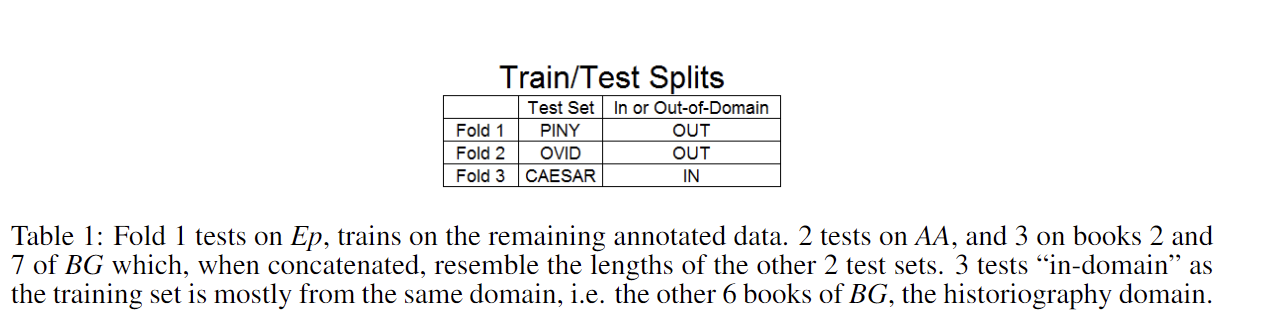

##RUN FROM THIS CELL DOWN

In [2]:
def open_book(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    words = [line.strip().split('\t')[1] for line in lines if '\t' in line]
    return words


EP = open_book('pliny.txt')
BG = open_book('cesar.txt')
AA = open_book('ovid.txt')
BG1 = open_book('COMENTARIUS_PRIMUS.txt')
BG2 = open_book('COMENTARIUS_SECUNDUS.txt')
BG3 = open_book('COMENTARIUS_TERTIUS.txt')
BG4 = open_book('COMENTARIUS_QUARTUS.txt')
BG5 = open_book('COMENTARIUS_QUINTUS.txt')
BG6 = open_book('COMENTARIUS_SEXTUS.txt')
BG7 = open_book('COMENTARIUS_SEPTIMUS.txt')
BG8 = open_book('COMENTARIUS_OCTAVUS.txt')

test1 = EP
train1 = BG + AA
print (f'Test 1: {len(test1)}')
print (f'Train 1: {len(train1)}')
test2 = AA
train2 = BG + EP
print (f'Test 2: {len(test2)}')
print (f'Train 2: {len(train2)}')

test3 = BG2+BG7
train3 = BG1+BG3+BG4+BG5+BG6+BG8  # + EP + AA ?????
print (f'Test 3: {len(test3)}')
print (f'Train 3: {len(train3)}')





Test 1: 18676
Train 1: 81289
Test 2: 17564
Train 2: 82401
Test 3: 10239
Train 3: 48895


In [3]:
# Creating a script to have the right format for words and labels in an array for Word2Vec
# Previous script (open_book) does not include labels, but it's still great for a quick generation of words-only data
def create_sentence_arrays(filename):
    """
    Grabs pre-split files, and puts them in an array for Word2Vec
    Sentence example: [('C.', PRS-B), ('Plinius', PRS-I)]
    """
    sentences, sentence = [], []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line: # Clever way to check for sentence break 
                if sentence:
                    sentences.append(sentence)
                    sentence = []
            else:
                label, word = line.split('\t')
                sentence.append((word, label))
        if sentence:
            sentences.append(sentence)
    return sentences

In [4]:
# Word2Vec
from gensim.models import Word2Vec
sentences = create_sentence_arrays("pliny.txt")
sentences_for_w2v = [[word for word, label in sentence] for sentence in sentences]
w2v = Word2Vec(sentences=sentences_for_w2v, vector_size=100, window=5, min_count=1)

In [5]:
# Vectorizing each sentence, as Word2Vec only gives word vectors, but we need full sentences put together.
import numpy as np
def vectorize_sentence(sentence, model):
    vectors = []
    for word, _ in sentence:
        if word in model.wv:
            vectors.append(model.wv[word])
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

X = [vectorize_sentence(sentence, w2v) for sentence in sentences]
y = [[label for _, label in sentence] for sentence in sentences]

# Still needs to be padded out for training a model (something about that during one of the lectures was mentioned)
# labels also generated as we will need to somehow grab estimations ;)

In [6]:
from sklearn.cluster import KMeans


word_vectors = np.array([w2v.wv[word] for word in w2v.wv.index_to_key])
kmeans = KMeans(n_clusters=100, random_state=42).fit(word_vectors)


word_to_cluster = {word: cluster for word, cluster in zip(w2v.wv.index_to_key, kmeans.labels_)}


pred_labels = []
for sentence in sentences_for_w2v:
    pred_labels.append([word_to_cluster.get(word, -1) for word in sentence])

# for cluster_id in range(n_clusters):
#     print(f"\nCluster {cluster_id}:")
#     words_in_cluster = [word for word, cl in word_to_cluster.items() if cl == cluster_id]
#     print(words_in_cluster[:10])


c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\wenz\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\wenz\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\U

In [7]:
from collections import defaultdict
from sklearn.metrics import classification_report


true_flat = []
for sentence in y:
    for label in sentence:
        true_flat.append(1 if label != '0' else 0)
pred_flat = []
for sentence in pred_labels:
    pred_flat.extend(sentence)
cluster_to_true = defaultdict(list)
for p, t in zip(pred_flat, true_flat):
    cluster_to_true[p].append(t)
cluster_to_entity = {
    cluster_id: (sum(labels) / len(labels)) >= 0.5
    for cluster_id, labels in cluster_to_true.items()
}
pred_entity_flat = [int(cluster_to_entity[p]) for p in pred_flat]


print(classification_report(true_flat, pred_entity_flat, target_names=["Non-Entity", "Entity"]))


              precision    recall  f1-score   support

  Non-Entity       0.97      1.00      0.98     18058
      Entity       0.00      0.00      0.00       618

    accuracy                           0.97     18676
   macro avg       0.48      0.50      0.49     18676
weighted avg       0.93      0.97      0.95     18676



c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Results are shit, Kmeans are shit. try DBSCAN

In [8]:
from sklearn.cluster import DBSCAN
import numpy as np


word_vectors = np.array([w2v.wv[word] for word in w2v.wv.index_to_key])
dbscan = DBSCAN(eps=0.15, min_samples=2).fit(word_vectors)
word_to_cluster = {
    word: cluster_id for word, cluster_id in zip(w2v.wv.index_to_key, dbscan.labels_)
}
#repeated, to run without touching clustering
pred_labels = []
for sentence in sentences_for_w2v:  
    pred_labels.append([word_to_cluster.get(word, -1) for word in sentence])

In [9]:
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"DBSCAN found {num_clusters} clusters")


DBSCAN found 2 clusters


In [10]:
from sklearn.metrics import pairwise_distances

dists = pairwise_distances(word_vectors)
avg_dist = np.mean(dists)
min_dist = np.min(dists[np.nonzero(dists)])
max_dist = np.max(dists)

print(f"Avg dist: {avg_dist:.4f}, Min dist: {min_dist:.4f}, Max dist: {max_dist:.4f}")


Avg dist: 0.1102, Min dist: 0.0561, Max dist: 3.4784


Fail, try BERT supported

In [11]:
sentences = create_sentence_arrays("pliny.txt")
sentences_for_w2v = [[word for word, label in sentence] for sentence in sentences]


In [12]:

# High level overview of unsupervised NER pipeline
# 1. Load BERT embeddings
# 2. Cluster embeddings
# 3. Map clusters to entity/non-entity
# 4. Evaluate baseline
# 5. Train reconstructor neural net
# 6. Evaluate reconstructor

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics import classification_report
import torch.nn as nn

tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased")
model.eval()  

# get embeddings from BERT (from subword to word level)

all_tokens = []  # each item will be {'word': ..., 'embedding': ..., 'sentence_idx': ...}

with torch.no_grad():  
    for idx, sentence in enumerate(sentences_for_w2v):
        # Tokenize the sentence → BERT tokenizer splits into subwords, maps tokens to ids
        encoded = tokenizer(sentence, return_tensors='pt', truncation=True, is_split_into_words=True, padding=True)
        
        # pass tokenized sentences through BERT model to get embeddings as last hidden state
        outputs = model(**encoded)
        embeddings = outputs.last_hidden_state.squeeze(0)  

        word_ids = encoded.word_ids(0)  # maps subword positions to original word indices

        
        token_vecs = []  # will hold one embedding per original token
        last_word_idx = None
        subword_accum = [] #temporary storage for subword embeddings

        for emb, word_idx in zip(embeddings, word_ids):
            if word_idx is None:
                continue  # skip special tokens 
            if word_idx != last_word_idx and subword_accum:
               
                avg_embedding = torch.mean(torch.stack(subword_accum), dim=0)
                token_vecs.append((avg_embedding, last_word_idx))
                subword_accum = []
            subword_accum.append(emb)
            last_word_idx = word_idx

        #last word
        if subword_accum:
            avg_embedding = torch.mean(torch.stack(subword_accum), dim=0)
            token_vecs.append((avg_embedding, last_word_idx))

        for emb_vec, word_pos in token_vecs:
            all_tokens.append({
                'word': sentence[word_pos],
                'embedding': emb_vec,  
                'sentence_idx': idx
            })

print(f"Total tokens processed: {len(all_tokens)}")


c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Total tokens processed: 18676


I put a cut here so that I don't constantly have to redo the parameters

In [13]:

#embs to numpy to utilize clustering
word_embeddings = [token['embedding'] for token in all_tokens]  
X = torch.stack(word_embeddings).numpy()  # shape: (num_tokens, hidden_size)


# clustering itself starts here
n_clusters = 2_000 #play with it
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
cluster_ids = kmeans.labels_  # extract id of the cluster for each token

# I SIMPLIFIED THE PROBLEM TO ENTITY/NON-ENTITY
# !TBD: try without flattening, look at Span F1

true_flat = [label for word in y for label in word] #gold labels 

# for sentence in y:
#     for label in sentence:
#         true_flat.append(1 if label != '0' else 0)


cluster_to_true = defaultdict(list)
for c_id, t in zip(cluster_ids, true_flat): # c_id = cluster id, t = true label
    cluster_to_true[c_id].append(t) # count how many entities in each cluster


# cluster_to_entity = {cid: (sum(labels) / len(labels)) >= 0.5 for cid, labels in cluster_to_true.items()} # majority vote for entity/non-entity
cluster_to_entity = {cid: max(set(labels), key = labels.count) for cid, labels in cluster_to_true.items()}
# !TBD 50% is not set in stone, play with it
print(f"Cluster mapping (Entity clusters): {[cid for cid, is_entity in cluster_to_entity.items() if is_entity]}")

# Predict entity/non-entity per token based on its cluster
pred_entity_flat = [cluster_to_entity[c_id] for c_id in cluster_ids]
print("\n BASELINE evaluation")
print(classification_report(true_flat, pred_entity_flat))


Cluster mapping (Entity clusters): [16, 38, 462, 85, 66, 1267, 110, 997, 230, 946, 708, 641, 227, 825, 137, 562, 1343, 98, 1384, 124, 1559, 843, 420, 1239, 1183, 169, 1079, 771, 1457, 623, 876, 1303, 393, 879, 363, 1326, 1649, 966, 1424, 192, 165, 1845, 182, 429, 869, 198, 475, 362, 569, 1230, 785, 82, 1516, 1330, 1266, 1137, 670, 12, 242, 575, 15, 578, 1908, 1144, 914, 559, 319, 254, 510, 410, 744, 286, 1501, 293, 1695, 320, 190, 18, 727, 1775, 123, 297, 81, 995, 1030, 487, 1634, 127, 710, 541, 619, 516, 148, 545, 526, 533, 931, 1878, 130, 1753, 662, 1705, 801, 220, 460, 164, 134, 333, 1664, 146, 249, 1459, 272, 1270, 1760, 1442, 170, 1916, 1257, 1220, 138, 653, 582, 1369, 117, 113, 842, 874, 1462, 195, 1740, 34, 160, 1052, 1199, 793, 1486, 888, 777, 991, 1983, 1049, 223, 176, 10, 210, 1465, 465, 154, 336, 1766, 1308, 1300, 683, 70, 257, 445, 656, 379, 1974, 1115, 177, 105, 502, 163, 315, 1478, 1316, 207, 551, 810, 1007, 1588, 305, 339, 196, 263, 385, 1450, 335, 723, 1392, 434, 1121, 

c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Checking how many clusters is a good amount

In [14]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# inertias = []
# K = range(300, 1000, 50)  # range of k values to test
# K = [50,100,500,1000,2000,4000,8000,10000] # for testing purposes
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)  # X is your data
#     inertias.append(kmeans.inertia_)

# plt.plot(K, inertias, 'bo-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

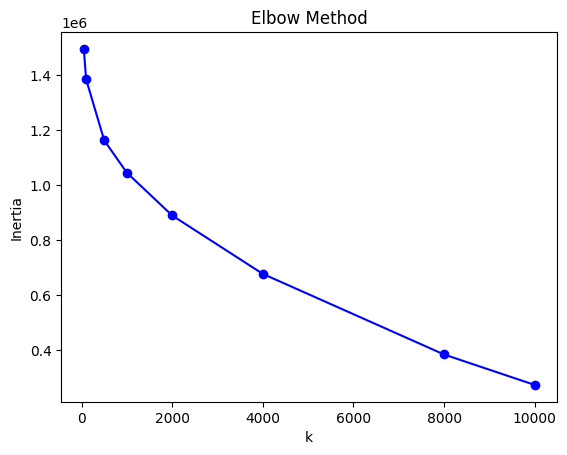

Given this image I eyeballed that a good amount of k would be 2.000 - using elbow method - and saving some computing power

Sanity Split

In [57]:
# reconstructing the model
# it is needed to generalize
in_size = X.shape[1] # 768, standard for BERT
# !TBD: try different hidden sizes, play with it, more layers works worse for me 
# I've tried 1 hidden layer with 16, 32, 64 and 2 layers with 128
# 1 layer with 32 works best so far
# MAYBE create pipeline with evaluation to finetune
# reconstructor = nn.Sequential(
#     nn.Linear(in_size, 32),
#     nn.ReLU(),
#     #nn.Dropout(0.3), doesn't help
#     nn.Linear(32, 1)  # output logits, I use BCEWithLogitsLoss, so no sigmoid here
# )

#Suggestions from CHAT-GPT: - seems to work better Epoch 10/10, Loss: 0.2511
reconstructor = nn.Sequential(
    nn.Linear(in_size, 32),
    nn.GELU(),
    nn.LayerNorm(32),  # or nn.BatchNorm1d(32)
    nn.Linear(32, len(set(true_flat))),  # output logits, I use BCEWithLogitsLoss, so no sigmoid here
)

# class imbalance handling, without it, perfomance is terrible
# !TBD you can try weighting them differently
# pos_weight_val = len(true_flat) / sum(true_flat) - 1
# pos_weight = torch.tensor([pos_weight_val], dtype=torch.float32)

# loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight) # 


# I am slowly losing my mind - I'm copzing stackoverflow now and autocomplete is actually trying to complete this comment for me

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_flat = [label for sentence in y for label in sentence]  # Flatten the list of lists
y_flat = list(label_encoder.fit_transform(y_flat)) # Encode labels as integers


#Class weights for CrossEntropyLoss
# counts = [true_flat.count(x) for x in set(true_flat)]
# class_weights = [len(true_flat) / (x+1e-6) for x in counts]  # add small value to avoid division by zero
# class_weights = [x / sum(class_weights) for x in class_weights]  # normalize weight
# class_weights = torch.tensor(class_weights, dtype=torch.float32)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_flat, dtype=torch.long)

counts = np.bincount(y_tensor, minlength=len(set(y_flat)))
class_weights = counts.sum() / (counts + 1e-6)
class_weights = class_weights / class_weights.sum()  # optional
class_weights = torch.tensor(class_weights, dtype=torch.float32)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.Adam(reconstructor.parameters(), lr=1e-3)

# training
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    logits = reconstructor(X_tensor).squeeze()  # output shape: (num_tokens,)
    loss = loss_fn(logits, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:  # print every 50 epochs
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    # print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# predicting
with torch.no_grad():
    logits = reconstructor(X_tensor).squeeze()
    recon_probs = torch.sigmoid(logits).numpy()
    recon_bin = (recon_probs >= 0.5).astype(int)  # threshold 0.5

# evaluation
print("\n RECONSTRUCTED evaluation(scroll down, look at the entity metrics!)")
recon_bin = torch.tensor(recon_bin, dtype=torch.long)
predicted_classes = torch.argmax(recon_bin, dim=1).cpu().numpy()  # shape: [batch_size]
print(classification_report(y_flat, predicted_classes))


Epoch 50/500, Loss: 0.1967
Epoch 100/500, Loss: 0.0533
Epoch 150/500, Loss: 0.0252
Epoch 200/500, Loss: 0.0154
Epoch 250/500, Loss: 0.0105
Epoch 300/500, Loss: 0.0077
Epoch 350/500, Loss: 0.0059
Epoch 400/500, Loss: 0.0047
Epoch 450/500, Loss: 0.0038
Epoch 500/500, Loss: 0.0031

 RECONSTRUCTED evaluation(scroll down, look at the entity metrics!)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18058
           1       0.69      0.72      0.71        47
           2       0.50      1.00      0.67         1
           3       0.84      0.94      0.89        34
           4       0.92      0.91      0.92       376
           5       1.00      0.62      0.76       160

    accuracy                           0.99     18676
   macro avg       0.83      0.87      0.82     18676
weighted avg       0.99      0.99      0.99     18676



In [49]:
logits.shape

torch.Size([18676])

In [ ]:
# Metrics for both tokens and entities for Span-F1
# Grabbing data still not fully worked out, so that will be done soon
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# For token-level evaluation (i.e. Normal F1), this is how we used to do it in the past semesters
def evaluate_for_tokens(y_true_flat, y_pred_flat):
    # Weighted average accounts for class imbalance
    precision = precision_score(y_true_flat, y_pred_flat, average='weighted') 
    recall = recall_score(y_true_flat, y_pred_flat, average='weighted')
    f1 = f1_score(y_true_flat, y_pred_flat, average='weighted')
    report = classification_report(y_true_flat, y_pred_flat)
    return precision, recall, f1, report

# For entity-level evaluation (i.e. Span-F1), this is looking specifically for entitities
# It is the one that is recommended to us to use
# Calculation is the same as above just uses entities instead of tokens (not accounting for weighted average)
# Using custom calculation due to type sklearn not being able to use entities
def evaluate_for_full_entity_matches(true_entities, pred_entities):
    true_set = set((start, end, type_) for start, end, type_ in true_entities)
    pred_set = set((start, end, type_) for start, end, type_ in pred_entities)
    correct = len(true_set.intersection(pred_set))
    precision = correct / len(pred_set)
    recall = correct / len(true_set)
    f1 = 2 * precision * recall / (precision + recall)
    return precision, recall, f1

# For partial matches
def evaluate_for_partial_entity_matches(true_entities, pred_entities):
    partial_matches = 0
    for t_start, t_end, t_type in true_entities:
        for p_start, p_end, p_type in pred_entities:
            if (p_start <= t_end and p_end >= t_start and p_type == t_type): # The actual check for overlap (i.e. Partial Match)
                partial_matches += 1
                break
    precision = partial_matches / len(pred_entities)
    recall = partial_matches / len(true_entities)
    f1 = 2 * precision * recall / (precision + recall)
    return precision, recall, f1

# Converting tokens to entities
def tokens_to_entities(token_labels):
    entities = []
    current_entity = None
    for i, label in enumerate(token_labels):
        if label.startswith('B-'):
            if current_entity:
                entities.append(current_entity)
            current_entity = [i, i, label[2:]]
        elif label.startswith('I-') and current_entity and current_entity[2] == label[2:]:
            current_entity[1] = i
        elif label == 'O':
            if current_entity:
                entities.append(current_entity)
                current_entity = None
    if current_entity:
        entities.append(current_entity)
    return [(start, end, type_) for start, end, type_ in entities]

# Setting up the right format for getting entities
def process_text_file(file_path):
    # Read the file
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    # Extract labels and words
    original_labels = []
    words = []
    for line in lines:
        if line.strip():  # Skip empty lines
            parts = line.strip().split('\t')
            if len(parts) == 2:
                label, word = parts
                original_labels.append(label)
                words.append(word)
    # Convert labels to the expected format (B-TYPE, I-TYPE, O)
    converted_labels = []
    for label in original_labels:
        if label == '0':
            converted_labels.append('O')
        elif '-B' in label:  # PRS-B -> B-PRS
            entity_type = label.split('-')[0]
            converted_labels.append(f'B-{entity_type}')
        elif '-I' in label:  # PRS-I -> I-PRS
            entity_type = label.split('-')[0]
            converted_labels.append(f'I-{entity_type}')
    # Get entities using the function
    entities = tokens_to_entities(converted_labels)
    # If you want to display the actual words in each entity
    entity_words = []
    for start, end, entity_type in entities:
        entity_text = ' '.join(words[start:end+1])
        entity_words.append((entity_text, entity_type))
    return entities, entity_words

# Example usage
file_path =  "pliny.txt"
entities, entity_words = process_text_file(file_path)
print("Entities (start, end, type):", entities)
print("Entity words:", entity_words)
print(evaluate_for_full_entity_matches(entities, entities))
print(evaluate_for_partial_entity_matches(entities, entities))

Entities (start, end, type): [(0, 1, 'PRS'), (2, 3, 'PRS'), (71, 72, 'PRS'), (73, 74, 'PRS'), (114, 114, 'PRS'), (118, 118, 'PRS'), (180, 180, 'PRS'), (302, 303, 'PRS'), (304, 305, 'PRS'), (310, 310, 'GEO'), (511, 512, 'PRS'), (513, 514, 'PRS'), (520, 520, 'GEO'), (523, 523, 'GEO'), (526, 526, 'GEO'), (529, 529, 'GEO'), (533, 533, 'GEO'), (647, 648, 'PRS'), (649, 650, 'PRS'), (655, 656, 'PRS'), (660, 660, 'PRS'), (671, 671, 'PRS'), (686, 687, 'PRS'), (702, 702, 'PRS'), (714, 714, 'PRS'), (721, 721, 'PRS'), (725, 726, 'PRS'), (734, 735, 'PRS'), (745, 745, 'PRS'), (747, 747, 'PRS'), (755, 755, 'PRS'), (760, 760, 'PRS'), (785, 785, 'PRS'), (786, 786, 'PRS'), (790, 791, 'PRS'), (793, 793, 'PRS'), (802, 803, 'PRS'), (814, 814, 'PRS'), (819, 819, 'PRS'), (827, 827, 'PRS'), (831, 831, 'PRS'), (883, 883, 'PRS'), (910, 910, 'PRS'), (916, 916, 'PRS'), (977, 978, 'PRS'), (981, 982, 'PRS'), (994, 994, 'PRS'), (1009, 1009, 'PRS'), (1038, 1038, 'PRS'), (1056, 1056, 'PRS'), (1065, 1065, 'PRS'), (1089